<a href="https://colab.research.google.com/github/nasta987/My_repository/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Linear%20equation.%20With%20range%20-10%3B%2B10%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0040
Epoch 2/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 3/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2668e-04
Epoch 4/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0930e-04
Epoch 5/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2793e-04
Epoch 6/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5993e-04
Epoch 7/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0577e-04
Epoch 8/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9914e-04
Epoch 9/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4479e-04
Epoch 10/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3676e-04
Epoch 11/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3337e-04
Epoch 12/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3215e-04
Epoch 13/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0768e-04
Epoch 14/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0735

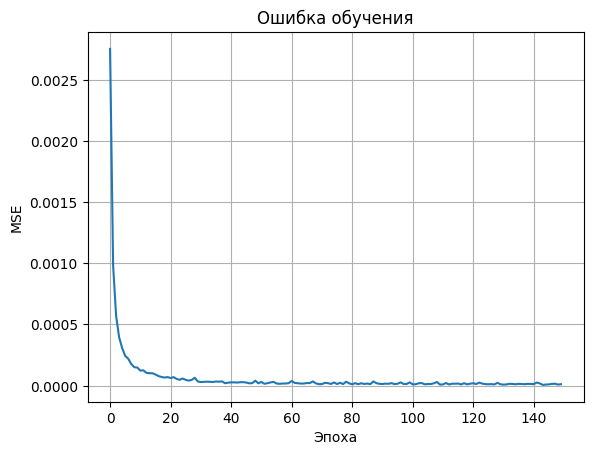

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Генерация данных с равномерным x
xs = []
ys = []

for _ in range(20000):
    x = np.random.uniform(-20, 20)
    a = np.random.uniform(-100, 100)
    while abs(a) < 1:
        a = np.random.uniform(-100, 100)
    b = np.random.uniform(-100, 100)
    c = a * x + b

    xs.append([a / 100, b / 100, c / 1000])
    ys.append(x / 100)  # нормализованный x

xs = np.array(xs, dtype=np.float32)
ys = np.array(ys, dtype=np.float32).reshape(-1, 1)

# Модель
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Обучение
history = model.fit(xs, ys, epochs=150, batch_size=64, verbose=1)

# График ошибки
plt.plot(history.history['loss'])
plt.title('Ошибка обучения')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

# Предсказание
def solve_equation(a, b, c):
    input_data = np.array([[a / 100, b / 100, c / 1000]], dtype=np.float32)
    prediction = model.predict(input_data)
    return prediction[0][0] * 100  # обратная нормализация



In [ ]:
import re

def parse_equation(equation_str):
    # Пример: "5x - 10 = 5"
    match = re.match(r'^\s*([+-]?\s*\d*\.?\d*)?\s*x\s*([+-]\s*\d*\.?\d*)?\s*=\s*([+-]?\s*\d*\.?\d*)\s*$', equation_str)
    if not match:
        raise ValueError("Неверный формат. Пример: 5x - 10 = 5")

    a_raw = match[1].replace(" ", "") if match[1] else "1"
    if a_raw in ["+", "-"]:
        a_raw += "1"
    a = float(a_raw)

    b = float(match[2].replace(" ", "")) if match[2] else 0
    c = float(match[3].replace(" ", ""))

    return a, b, c

# Ввод уравнения
equation = input("Введите уравнение вида ax + b = c: ")
try:
    a, b, c = parse_equation(equation)
    predicted_x = solve_equation(a, b, c)
    print(f"Решение уравнения {a}x + ({b}) = {c}: x ≈ {predicted_x:.4f}")
except Exception as e:
    print("Ошибка:", e)


Введите уравнение вида ax + b = c: 2x+3=11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Решение уравнения 2.0x + (3.0) = 11.0: x ≈ 4.4773


In [ ]:
equation = "2x+3=8"
a, b, c = parse_equation(equation)
print("a =", a)
print("b =", b)
print("c =", c)


a = 2.0
b = 3.0
c = 8.0


In [ ]:
equation = input("Введите уравнение вида ax + b = c: ")
try:
    a, b, c = parse_equation(equation)
    predicted_x = solve_equation(a, b, c)
    true_x = (c - b) / a
    error = abs(predicted_x - true_x)

    print(f"Решение уравнения {a}x + ({b}) = {c}")
    print(f"🔮 Предсказание модели: x ≈ {predicted_x:.4f}")
    print(f"📐 Точное решение:     x = {true_x:.4f}")
    print(f"📉 Абсолютная ошибка:  {error:.4f}")
except Exception as e:
    print("Ошибка:", e)


Введите уравнение вида ax + b = c: 2x-3=8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Решение уравнения 2.0x + (-3.0) = 8.0
🔮 Предсказание модели: x ≈ 6.1531
📐 Точное решение:     x = 5.5000
📉 Абсолютная ошибка:  0.6531
